In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as sim

(101, 401)

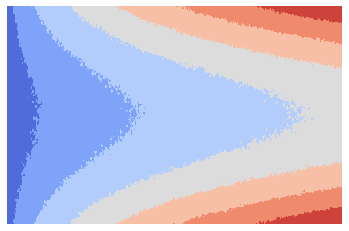

In [170]:
x = np.loadtxt('channeldata.csv',delimiter=',')
plt.contourf(x,cmap='coolwarm')
plt.axis('off')
ny,nx = x.shape
xx = np.linspace(0,401,nx)
yy = np.linspace(0,101,ny)
x.shape

(0.0, 400.0, 0.0, 99.0)

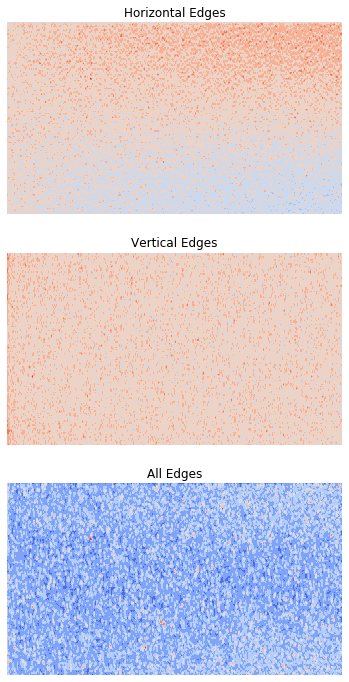

In [173]:
#This should hopefully detect the vertical and horizontal edges or a combination of both.
x1 = pd.read_csv('channeldata.csv')
x = x1.copy()
Dx= [[1,0],[-1,0]]
Dy= [[1,-1], [0,0]]

Gx = sim.convolve(x,Dx)
Gy = sim.convolve(x,Dy)
GG_totaledge = np.sqrt(Gx**2 + Gy**2)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.contourf(Gx,cmap='coolwarm')
plt.title('Horizontal Edges')
plt.axis('off')

# The vertical edges
plt.subplot(3,1,2)
plt.contourf(Gy,cmap='coolwarm')
plt.title('Vertical Edges')
plt.axis('off')



# All edges that were detected
plt.subplot(3,1,3)
plt.contourf(GG_totaledge,cmap='coolwarm')
plt.title('All Edges')
plt.axis('off')

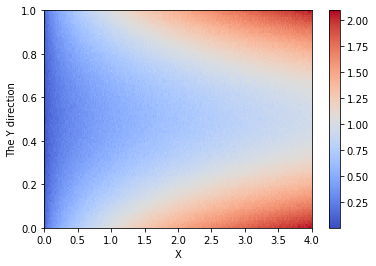

In [177]:
# (C) The Gradient of the file.
x = np.loadtxt('channeldata.csv',delimiter=',')
ny,nx = x.shape
xx = np.linspace(0,4,nx)
yy = np.linspace(0,1,ny)
plt.pcolormesh(xx,yy,x,cmap='coolwarm')# I think this is how it's meant to look
plt.xlabel('X')
plt.ylabel('The Y direction')
plt.colorbar()
#plt.axis('off')

In [178]:
xn = np.linspace(0,4,nx)
yn = np.linspace(0,1,ny)



In [179]:
#x derivatives
xd = xn[1]-xn[0]
dCdx = np.zeros(x.shape)

#First point
dCdx[:,0]= (-3*x[:,0] +4*x[:,1]- x[:,2])/(2*xd)
#Last point
dCdx[:,-1]= (3*x[:,-1] -4*x[:,-2] + x[:,-3])/(2*xd)

#All other columns
dCdx[:,1:-1]=(x[:,2:]-x[:,:-2])/(2*xd)

In [180]:
#Y Derivatives 
yd = yn[1] - yn[0]
dCdy = np.zeros(x.shape)

#The first point
dCdy[0,:] = (-3*x[0,:] +4*x[1,:]- x[2,:])/(2*yd)
#The last point
dCdy[-1,:]= (3*x[-1,:]-4*x[-2,:] + x[-3,:])/(2*yd)
#All other vectorized points
dCdy[1:-1,:] = (x[2:,:] -x[:-2,:])/(2*yd)

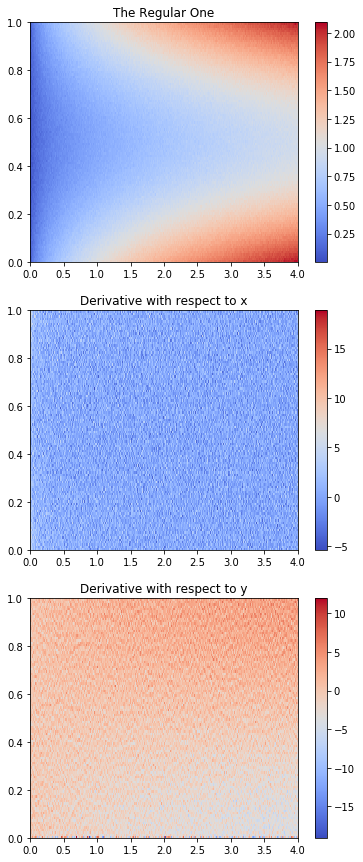

In [181]:
k = 1
x_n, y_n = np.meshgrid(xn,yn)
#X&Y are done
xd = xn[1]-xn[0]
dx = k*dCdx
dy = k*dCdy
#The plots

plt.figure(figsize=(6,15))
plt.subplot(311)
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.title('The Regular One')
plt.colorbar()


plt.subplot(312)
plt.pcolormesh(xx,yy,dx,cmap='coolwarm')
plt.title('Derivative with respect to x')
plt.colorbar()

plt.subplot(313)
plt.pcolormesh(xx,yy,dy,cmap='coolwarm')
plt.title('Derivative with respect to y')
plt.colorbar()

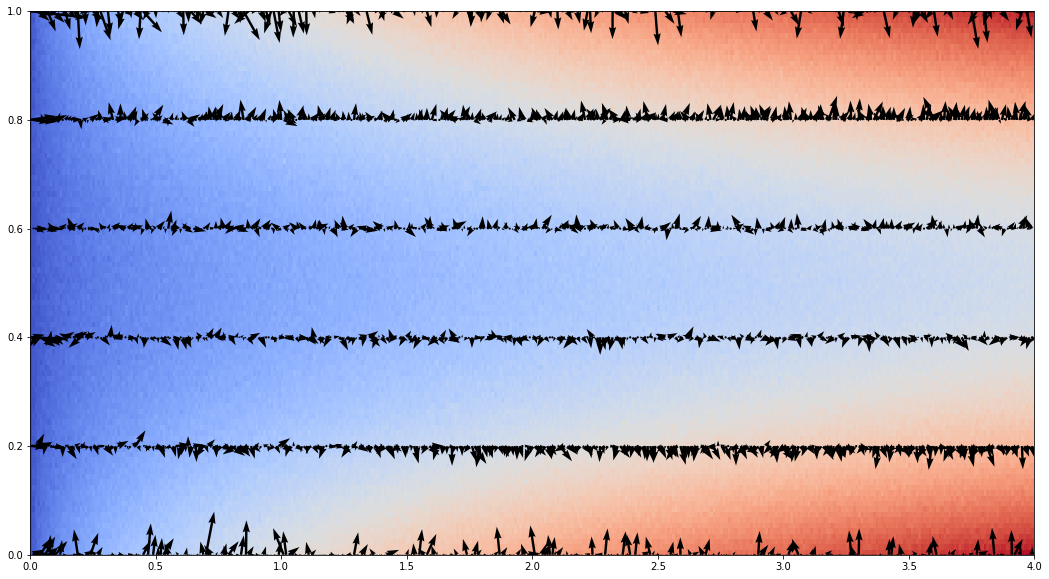

In [182]:
#The vectorized derivatives
#I'm using x_n & y_n
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.quiver(x_n[::20],y_n[::20],dx[::20],dy[::20])

#THIS Is the vector form.

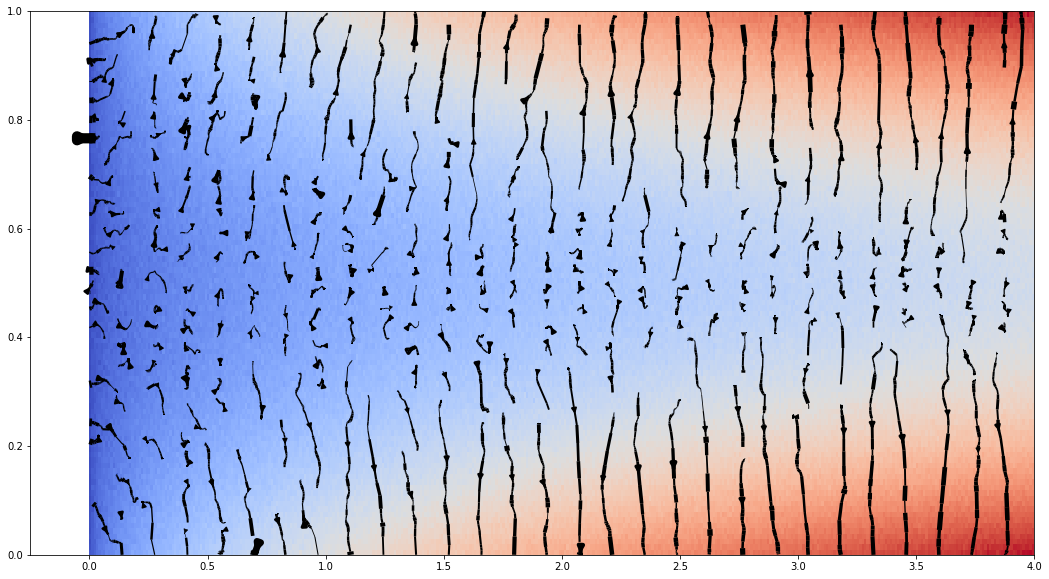

In [183]:
#dding a streamplot to see how this goes
#Uncomment the bottom and run it.
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='coolwarm')
plt.streamplot(x_n,y_n,dx,dy,linewidth=1*sqrxy,color='k')
plt.show()


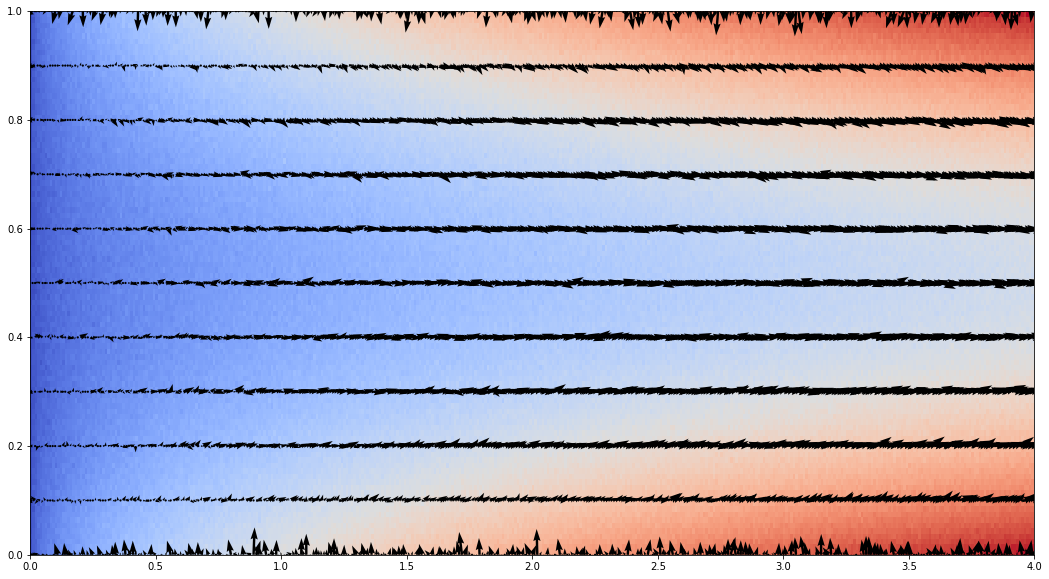

In [184]:
# My attempt at (D)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.quiver(x_n[::10],y_n[::10],dx[::10]*(-0.1)+((4*y_n[::10])*(1-y_n[::10])*(x[::10])),dy[::10]*(-0.1))
#THIS Is the vector form.

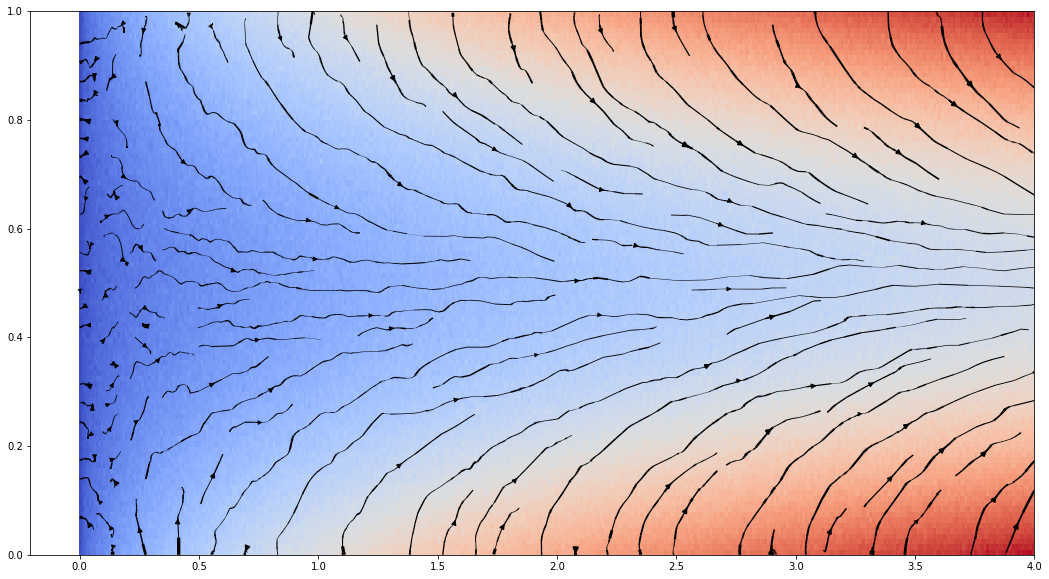

In [141]:
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='coolwarm')
plt.streamplot(x_n,y_n,dx*(-0.1)+((4*y_n)*(1-y_n)*x),dy*(-0.1),linewidth=0.5*sqrxy,color='k')
plt.show()


In [149]:
# My attempt at (E)
#It's below. In all honesty, I don't think this is right. I did this on Sunday
#Let's Do this
#I'm not sure this is what he meant. I did something I guess.
#I knew it this is wrong.
def trapz(y,x):
    # determine spacing array
    h=x[1]-x[0]
    
    # sum of h x non-end points
    I=sum(h*y[1:-1])
    
    # add one-half h x end points
    I+=(y[0]+y[-1])*h/2
    
    return I


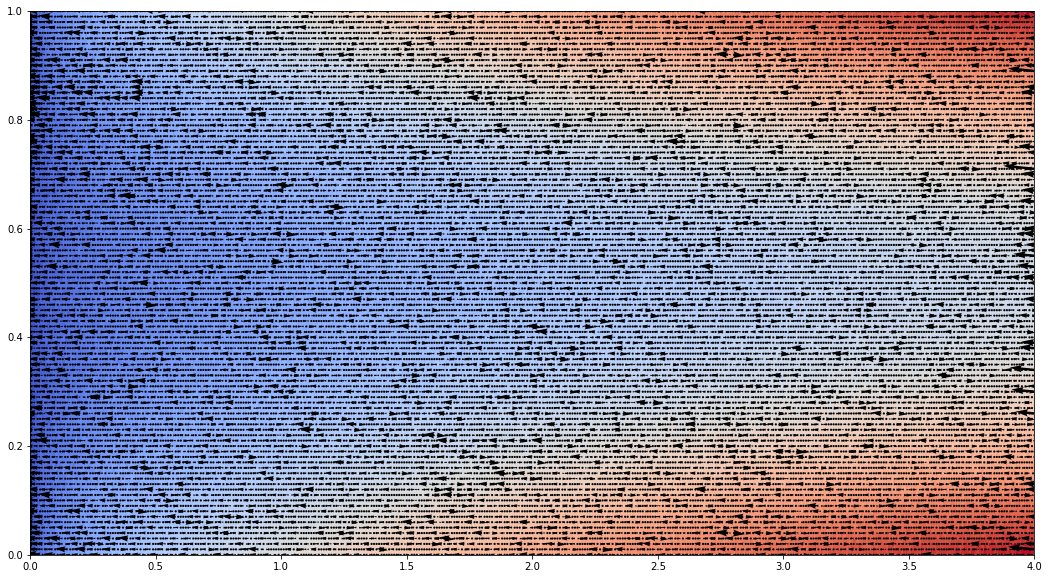

In [103]:
x_int = np.arange(0.5,4,0.1)
y_integral = (dx[13:,:]*(-0.1)+((4*y_n[13:,:])*(1-y_n[13:,:])*(0.01))*y_n[13:,:])
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap='coolwarm')
plt.quiver(x_n[::],y_n[::],-dx[13:,:],-y_integral)


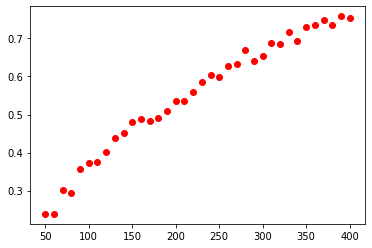

In [157]:
#This is (E)
#I can use Newton Law of approximation to find where the y point hits the x horizontal.
# That's the length of the channel
# That was quick


x22 = np.arange(50,401,10)
#s_tot = (x)*((dx*(-0.1)+((4*y_n)*(1-y_n)*(0.01)))*sum(y_n))#Representing the sum
qx = dx*(-0.1)+((4*y_n)*(1-y_n)*x)
t=[]
for i in range(len(x22)):   
    t1=trapz(qx[:,x22[i]],yy)
    t.append(t1)
plt.plot(x22,t,'ro')




In [150]:
#Q(x)= -D*dx*y + 2*y**2 - (4/3)*y**3


-0.19410963494520367

In [119]:
import matplotlib.pyplot as plt 
s_t = (-.1)*sum(dx[10*x+7])*sum(sum(y_n)) + 2*sum(sum(2*y_n**2)) -4/3*sum(sum(y**3))

IndexError: arrays used as indices must be of integer (or boolean) type

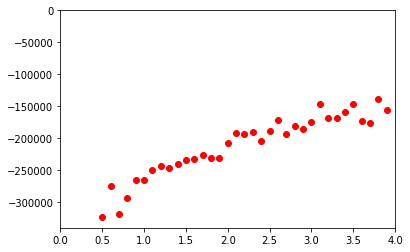

In [156]:
x1 = np.arange(0.5,4.0,0.1)
s = []
for i in range(35):
    s_t =(-.1)*sum(dx[12+i])*sum(sum(y_n)) + 2*sum(sum(2*y_n**2)) -4/3*sum(sum(y_n**3))
    s.append(s_t)
plt.pcolormesh(xx,yy,x)    
plt.plot(x1,s,'ro')
#I tried   
